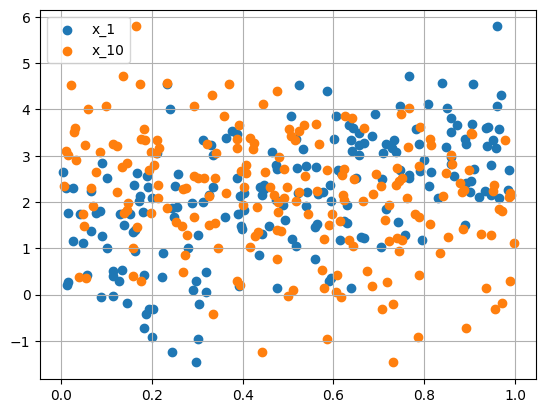

In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
# Generate the random variables 

x = np.random.uniform(0, 1, (200, 15)) 
epsilon = norm.rvs(size=200) 

# Generate y 
y = 1.0 + 1.7*x[:,0] + 1.2*x[:,1] + 0.8*x[:,5] - 1.5*x[:,9] + epsilon 
# Plot the scatter plots 
plt.scatter(x[:,0], y, label = 'x_1')
plt.scatter(x[:,9], y, label = 'x_10')
plt.grid()
plt.legend()
plt.show()

In [34]:
import statsmodels.api as sm
# Fit the linear model
X = sm.add_constant(x) 
model = sm.OLS(y, X)
results = model.fit()

# Calculate the SSE, SSR, TSS, and R-squared 
SSE = np.sum(results.resid ** 2)
SSR = np.sum((results.fittedvalues - np.mean(y)) ** 2)
TSS = np.sum((y - np.mean(y)) ** 2)
R2 = SSR / TSS

# Estimate the error variance 
n, k = X.shape
sigma2 = SSE / (n - k)

print(f'The SSE is {SSE}')
print(f'The SSR is {SSR}')
print(f'The sum of SSE and SSR is {SSE + SSR:.4f}')
print(f'The TSS is {TSS}')
print(f'The R^2 is {R2}')
print(f'The errors variance is {sigma2}')

The SSE is 181.43729194818457
The SSR is 148.60731656301726
The sum of SSE and SSR is 330.0446
The TSS is 330.0446085112021
The R^2 is 0.4502643361858564
The errors variance is 0.9860722388488291


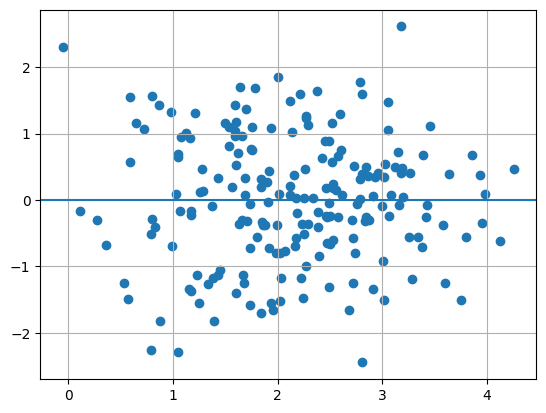

In [35]:
ymle = results.params[0]+np.dot(results.params[1:16],x.T)
residuals = y-ymle
plt.scatter(ymle,residuals)
plt.axhline(0,xmin=0,xmax=5)
plt.grid()
plt.show()

In [36]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     10.05
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           3.05e-17
Time:                        17:17:29   Log-Likelihood:                -274.05
No. Observations:                 200   AIC:                             580.1
Df Residuals:                     184   BIC:                             632.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4892      0.473      1.034      0.3